Automatically created module for IPython interactive environment


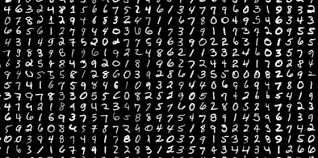

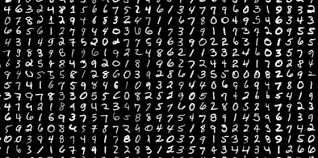

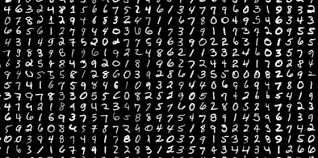

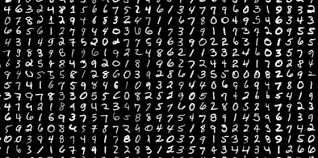

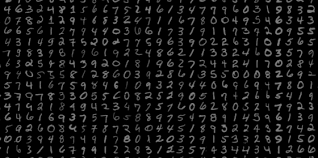

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

### Minimal Sketcher class integrated (no need for common.py)
class Sketcher:
    def __init__(self, windowname, dests, color_func):
        self.dests = dests
        self.color_func = color_func
        self.dirty = False
        self.drawing = False
        self.prev_pt = None
        self.windowname = windowname

        # cv.namedWindow(self.windowname) # Removed due to no GUI support
        # cv.setMouseCallback(self.windowname, self.on_mouse) # Removed due to no GUI support
        self.show()

    def show(self):
        # cv.imshow(self.windowname, self.dests[0]) # Replaced with cv2_imshow
        cv2_imshow(self.dests[0])

    def on_mouse(self, event, x, y, flags, param):
        # Mouse callbacks are not supported in Colab environment
        pass

### Watershed App
class App:
    def __init__(self, fn):
        self.img = cv.imread(fn)
        if self.img is None:
            raise Exception('Failed to load image file: %s' % fn)

        h, w = self.img.shape[:2]
        self.markers = np.zeros((h, w), np.int32)
        self.markers_vis = self.img.copy()
        self.cur_marker = 1
        self.colors = np.int32(list(np.ndindex(2, 2, 2))) * 255  # 8 colors

        self.auto_update = True
        # Mouse callbacks are not supported in Colab environment, so we pass None for the window name
        self.sketch = Sketcher(None, [self.markers_vis, self.markers], self.get_colors)

        # Show original image at start
        # cv.imshow('1. Original Image', self.img) # Replaced with cv2_imshow
        cv2_imshow(self.img)

    def get_colors(self):
        return list(map(int, self.colors[self.cur_marker])), self.cur_marker

    def watershed(self):
        m = self.markers.copy()
        cv.watershed(self.img, m)

        # Create colored segmentation overlay
        overlay = self.colors[np.maximum(m, 0)]
        vis = cv.addWeighted(self.img, 0.5, overlay, 0.5, 0.0, dtype=cv.CV_8UC3)

        # Show all outputs
        # cv.imshow('1. Original Image', self.img) # Replaced with cv2_imshow
        # cv.imshow('2. Marker Labels', self.markers_vis) # Replaced with cv2_imshow
        # cv.imshow('3. Watershed Segmentation', vis) # Replaced with cv2_imshow
        cv2_imshow(self.img)
        cv2_imshow(self.markers_vis)
        cv2_imshow(vis)


    def run(self):
        # Removed the while loop and waitKey since mouse callbacks and windows are not supported
        # Instead, we will just perform the watershed segmentation once
        self.watershed()
        # cv.destroyAllWindows() # Removed as no windows are created

if __name__ == '__main__':
    print(__doc__)

    # ✅ Set your image file path here
    fn = r"/content/download.png" # <-- change path as needed

    App(fn).run()